<a href="https://colab.research.google.com/github/Tahsin-Azad-Tias/Thesis/blob/main/preprocessing/Preprocessing_Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install CSIKit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 777.9 kB/s eta 0:00:00


In [ ]:
import os
import glob
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from CSIKit.filters.passband import bandpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Thesis_Vibration_CSI

/content/drive/MyDrive/Thesis_Vibration_CSI


In [ ]:
! csikit Hz-0.dat

Hardware: QCA93XX
Backend: Atheros CSI Tool
Bandwidth: 20MHz
Antenna Configuration: 2 Rx, 2 Tx
Frame Count: 11933
Subcarrier Count: 56
Length: 2.41s
Average Sample Rate: 4954.10Hz
Average RSSI: 49.0dBm
CSI Shape: (11933, 56, 2, 2)


In [ ]:
directory_path = './'
directory_files = os.listdir(directory_path)
print(directory_files)

['Hz-3.dat', 'Hz-4.dat', 'Hz-5.dat', 'Hz-6.dat', 'Hz-7.dat', 'Hz-8.dat', 'Hz-9.dat', 'Hz-10.dat', 'Hz-11.dat', 'Hz-12.dat', 'Hz-13.dat', 'Hz-14.dat', 'Hz-15.dat', 'Hz-16.dat', 'Hz-17.dat', 'Hz-18.dat', 'Hz-2.dat', 'Hz-1.dat', 'Hz-0.dat', 'Hz-19.dat', 'Hz-20.dat', 'Train', 'Test', 'Model', 'shapelet_model.joblib', 'finalized_shapelet_model.sav', 'output-amplitude-Hz-3.dat', 'output-phase-Hz-3.dat', 'output-amplitude-Hz-4.dat', 'output-phase-Hz-4.dat', 'output-amplitude-Hz-5.dat', 'output-phase-Hz-5.dat', 'output-amplitude-Hz-6.dat', 'output-phase-Hz-6.dat', 'output-amplitude-Hz-7.dat', 'output-phase-Hz-7.dat', 'output-amplitude-Hz-8.dat', 'output-phase-Hz-8.dat', 'output-amplitude-Hz-9.dat', 'output-phase-Hz-9.dat', 'output-amplitude-Hz-10.dat', 'output-phase-Hz-10.dat', 'output-amplitude-Hz-11.dat', 'output-phase-Hz-11.dat', 'output-amplitude-Hz-12.dat', 'output-phase-Hz-12.dat', 'output-amplitude-Hz-13.dat', 'output-phase-Hz-13.dat', 'output-amplitude-Hz-14.dat', 'output-phase-Hz-14.d

In [ ]:
import glob

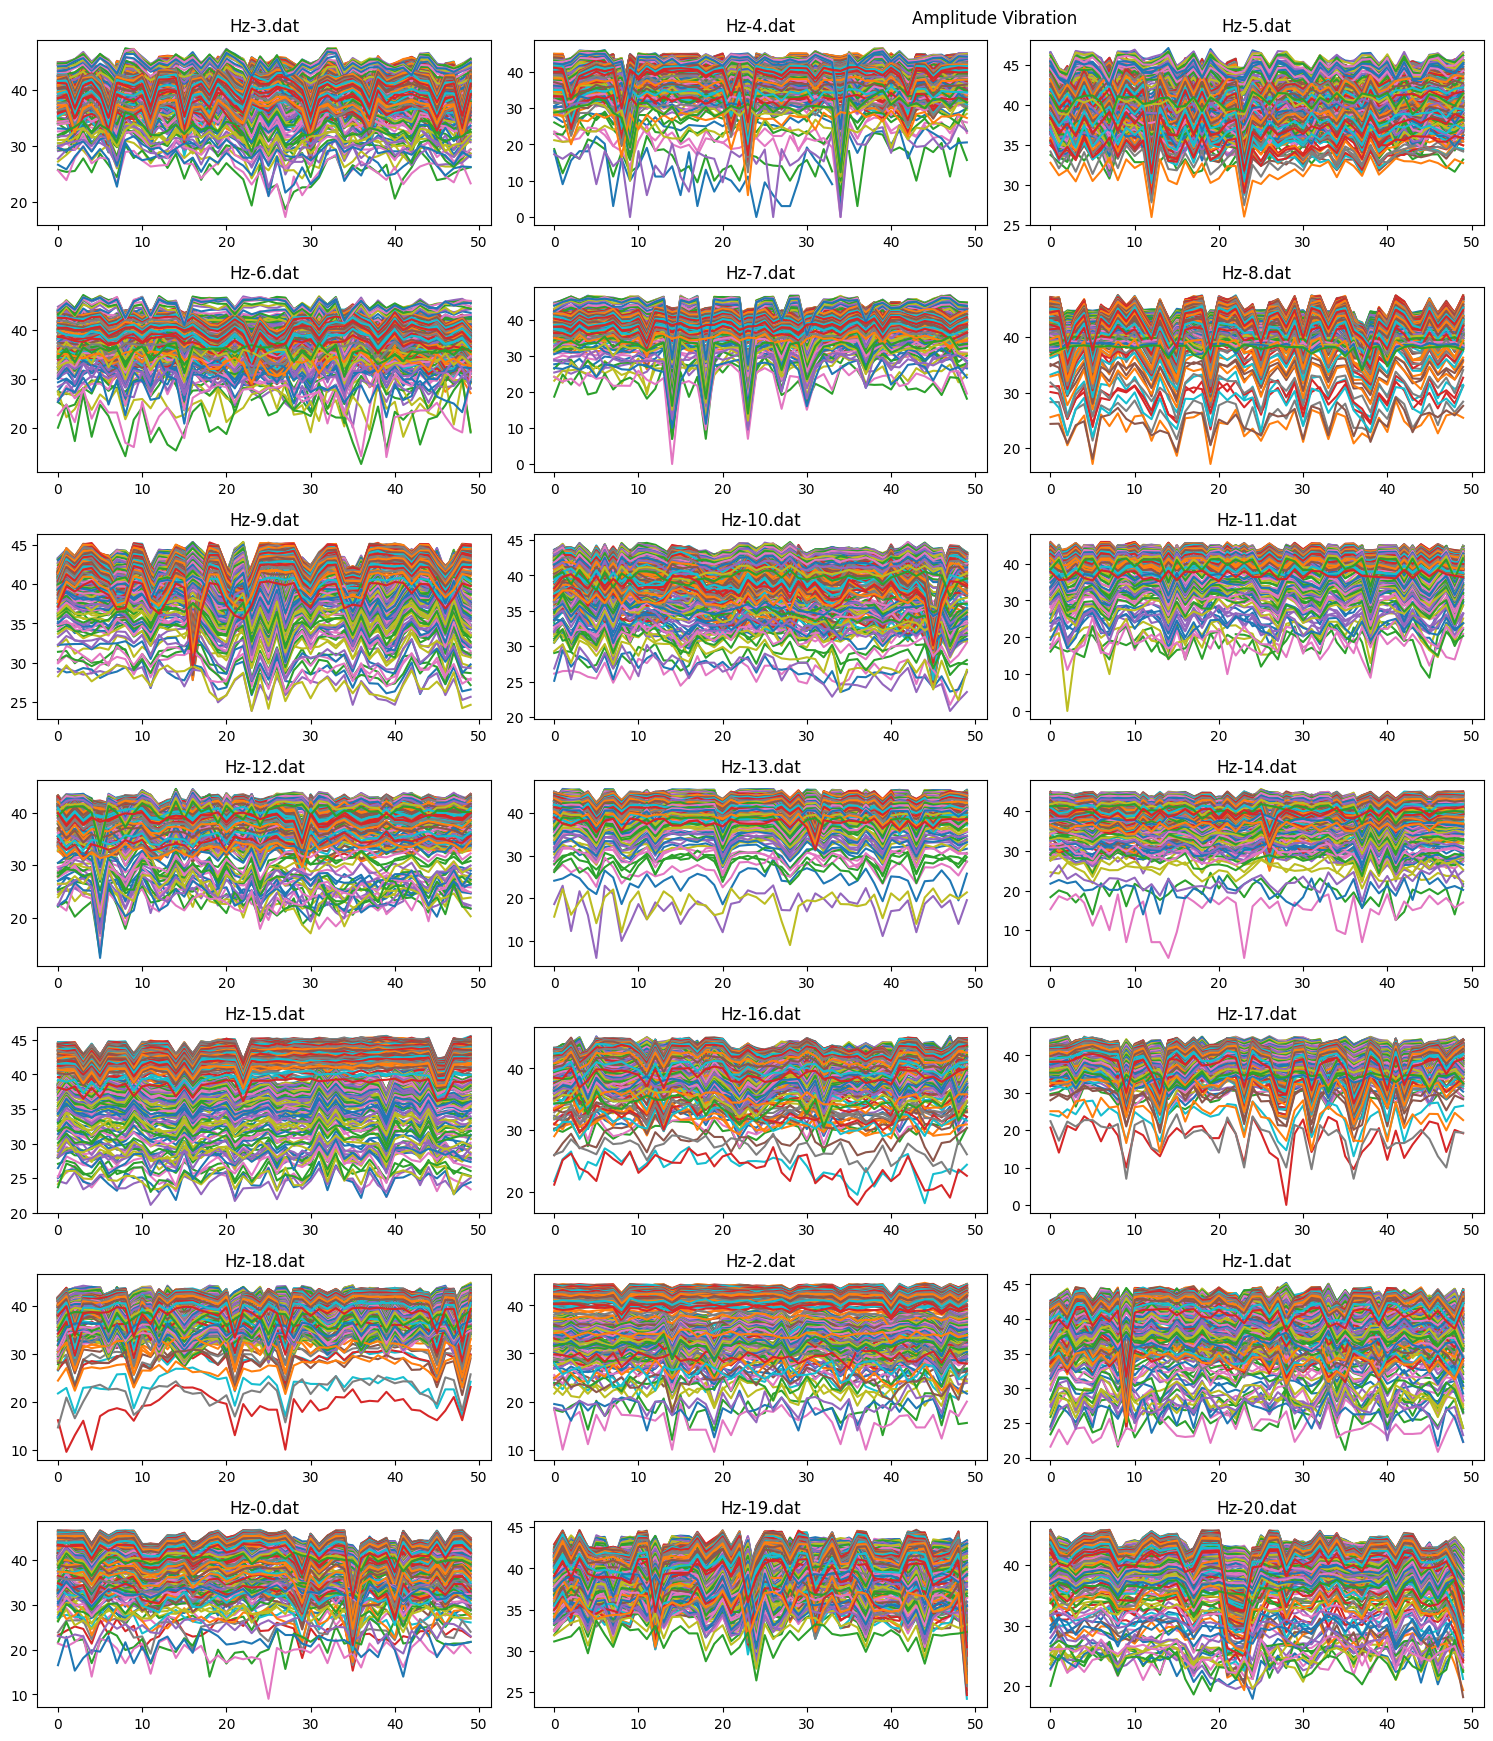

In [ ]:
amp_lists = glob.glob('./output-amplitude*.dat')
count = 0
fig = plt.figure(figsize=(20,20))
fig.suptitle("Amplitude Vibration")
for file in amp_lists:
  d = read_csv(file)
  DB = d.values
  plot = plt.subplot2grid((8, 4), (int(count/3), int(count%3)))
  plot.plot(DB[200:250])
  plot.set_title('-'.join(file.split('-')[2:]))
  count = count + 1

plt.tight_layout()
plt.show()

In [ ]:
amp_lists.sort()
amp_lists

['./output-amplitude-Hz-0.dat',
 './output-amplitude-Hz-1.dat',
 './output-amplitude-Hz-10.dat',
 './output-amplitude-Hz-11.dat',
 './output-amplitude-Hz-12.dat',
 './output-amplitude-Hz-13.dat',
 './output-amplitude-Hz-14.dat',
 './output-amplitude-Hz-15.dat',
 './output-amplitude-Hz-16.dat',
 './output-amplitude-Hz-17.dat',
 './output-amplitude-Hz-18.dat',
 './output-amplitude-Hz-19.dat',
 './output-amplitude-Hz-2.dat',
 './output-amplitude-Hz-20.dat',
 './output-amplitude-Hz-3.dat',
 './output-amplitude-Hz-4.dat',
 './output-amplitude-Hz-5.dat',
 './output-amplitude-Hz-6.dat',
 './output-amplitude-Hz-7.dat',
 './output-amplitude-Hz-8.dat',
 './output-amplitude-Hz-9.dat']

In [ ]:
data = read_csv(amp_lists[0])

In [ ]:
data.head()

Sub 0 RXTX 0/0  Sub 0 RXTX 0/1  Sub 0 RXTX 1/0  Sub 0 RXTX 1/1  \
0       40.856829       42.281179       30.937718       44.239827   
1       43.328423       41.496501       34.701164       44.362581   
2       40.888092       41.938478       31.392492       44.054147   
3       42.835274       41.965907       32.753114       43.877101   
4       40.539232       42.040385       31.607686       44.100345   

   Sub 1 RXTX 0/0  Sub 1 RXTX 0/1  Sub 1 RXTX 1/0  Sub 1 RXTX 1/1  \
0       40.985053       42.401497       31.392492       44.222122   
1       43.698094       42.379959       34.963761       44.222779   
2       41.253186       42.411728       31.401937       44.142545   
3       43.202709       42.494674       33.362596       44.040979   
4       40.740847       42.416461       31.670218       44.136685   

   Sub 2 RXTX 0/0  Sub 2 RXTX 0/1  ...  Sub 53 RXTX 1/0  Sub 53 RXTX 1/1  \
0       41.274288       42.756798  ...        39.119030        44.715851   
1       44.017451       42.985256  ...        42.136240        45.117363   
2       41.508178       42.756798  ...        39.544837        44.970679   
3       43.395111       42.831429  ...        41.389024        44.945024   
4       41.031535       42.871969  ...        38.937063        45.116829   

   Sub 54 RXTX 0/0  Sub 54 RXTX 0/1  Sub 54 RXTX 1/0  Sub 54 RXTX 1/1  \
0        31.467480        36.395861        38.890214        44.521239   
1        32.878017        34.667194        41.129400        44.162576   
2        30.965624        35.485123        39.098234        44.492624   
3        33.465486        35.794406        40.658037        44.144719   
4        30.433623        35.129511        38.424220        44.302364   

   Sub 55 RXTX 0/0  Sub 55 RXTX 0/1  Sub 55 RXTX 1/0  Sub 55 RXTX 1/1  
0        31.007151        37.712934        38.021578        43.616523  
1        33.396502        36.928469        40.905049        43.588672  
2        31.498347        37.336787        38.276277        43.522597  
3        33.811151        37.681940        39.889155        43.232521  
4        30.681859        36.909930        37.896512        43.591712  

[5 rows x 224 columns]

In [ ]:
data = data.values

In [ ]:
data.shape

(11933, 224)

In [ ]:
new_csi_matrix = data[2500:2800]
new_csi_matrix.shape

(300, 224)

In [ ]:
from CSIKit.filters.passband import lowpass

In [ ]:
amp_lists.sort()
print(amp_lists)
print(len(amp_lists))

['./output-amplitude-Hz-0.dat', './output-amplitude-Hz-1.dat', './output-amplitude-Hz-10.dat', './output-amplitude-Hz-11.dat', './output-amplitude-Hz-12.dat', './output-amplitude-Hz-13.dat', './output-amplitude-Hz-14.dat', './output-amplitude-Hz-15.dat', './output-amplitude-Hz-16.dat', './output-amplitude-Hz-17.dat', './output-amplitude-Hz-18.dat', './output-amplitude-Hz-19.dat', './output-amplitude-Hz-2.dat', './output-amplitude-Hz-20.dat', './output-amplitude-Hz-3.dat', './output-amplitude-Hz-4.dat', './output-amplitude-Hz-5.dat', './output-amplitude-Hz-6.dat', './output-amplitude-Hz-7.dat', './output-amplitude-Hz-8.dat', './output-amplitude-Hz-9.dat']
21


In [ ]:
def filtering(csi_matrix):
    filtered_csi_matrix = np.zeros((300,224))
    for x in range(224):
        filtered_csi_matrix[:,x] = hampel(csi_matrix[:,x], 30)
        filtered_csi_matrix[:,x] = running_mean(filtered_csi_matrix[:,x], 30)

    return filtered_csi_matrix

In [ ]:
def vibration(csi_matrix):
    v_csi_matrix = np.zeros((300,224))
    for x in range(224):
        v_csi_matrix[:,x] = lowpass(csi_matrix[:,x], 10, 100, 5)

    return v_csi_matrix

In [ ]:
# This list will hold the data from all files
all_data = []

for file in amp_lists:
    data = pd.read_csv(file)


    data = data.iloc[2500:2800]

    csi_matrix = data.to_numpy()

    # Filtering
    filtered_csi_matrix = filtering(csi_matrix)

    v_csi_matrix = vibration(filtered_csi_matrix)
    v_csi_data = pd.DataFrame(v_csi_matrix)
    # Add to the list
    all_data.append(v_csi_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeW

In [ ]:
# Now we concatenate all the data vertically
amp_data = pd.concat(all_data, ignore_index=True)
print(amp_data.shape)

(6300, 224)


In [ ]:
amp_data.head()

0          1          2          3          4          5    \
0  42.147346  39.326350  29.890985  43.136659  42.461703  39.826034   
1  42.102956  39.291122  29.793977  43.096137  42.413188  39.795178   
2  42.063699  39.264767  29.708427  43.065561  42.369692  39.772260   
3  42.034200  39.253706  29.643911  43.052223  42.335739  39.762965   
4  42.018088  39.260527  29.606505  43.059177  42.314895  39.769486   

         6          7          8          9    ...        214        215  \
0  29.672381  43.273464  42.778527  40.467358  ...  40.333282  43.769518   
1  29.598609  43.232861  42.726119  40.426489  ...  40.281076  43.736592   
2  29.533573  43.201669  42.678824  40.394525  ...  40.234981  43.712852   
3  29.484701  43.186793  42.641297  40.377930  ...  40.200280  43.704868   
4  29.456900  43.191129  42.617338  40.379274  ...  40.180836  43.714983   

         216        217        218        219        220        221  \
0  33.717622  30.327831  39.794666  43.154503  33.230918  32.108199   
1  33.699082  30.242326  39.744955  43.119075  33.201103  32.066806   
2  33.684147  30.172112  39.700804  43.092839  33.174210  32.035914   
3  33.676245  30.128628  39.667167  43.082515  33.153135  32.022934   
4  33.678181  30.117147  39.647968  43.090907  33.140730  32.030418   

         222        223  
0  39.197549  42.432484  
1  39.143163  42.394341  
2  39.095089  42.365697  
3  39.058826  42.353496  
4  39.038428  42.360581  

[5 rows x 224 columns]

In [ ]:
pd.DataFrame(amp_data).to_csv("./preprocessed_test_data.csv", index=False)

In [ ]:
preprocessed_data = read_csv("./preprocessed_test_data.csv")

In [ ]:
preprocessed_data.head()

0          1          2          3          4          5  \
0  42.147346  39.326350  29.890985  43.136659  42.461703  39.826034   
1  42.102956  39.291122  29.793977  43.096137  42.413188  39.795178   
2  42.063699  39.264767  29.708427  43.065561  42.369692  39.772260   
3  42.034200  39.253706  29.643911  43.052223  42.335739  39.762965   
4  42.018088  39.260527  29.606505  43.059177  42.314895  39.769486   

           6          7          8          9  ...        214        215  \
0  29.672381  43.273464  42.778527  40.467358  ...  40.333282  43.769518   
1  29.598609  43.232861  42.726119  40.426489  ...  40.281076  43.736592   
2  29.533573  43.201669  42.678824  40.394525  ...  40.234981  43.712852   
3  29.484701  43.186793  42.641297  40.377930  ...  40.200280  43.704868   
4  29.456900  43.191129  42.617338  40.379274  ...  40.180836  43.714983   

         216        217        218        219        220        221  \
0  33.717622  30.327831  39.794666  43.154503  33.230918  32.108199   
1  33.699082  30.242326  39.744955  43.119075  33.201103  32.066806   
2  33.684147  30.172112  39.700804  43.092839  33.174210  32.035914   
3  33.676245  30.128628  39.667167  43.082515  33.153135  32.022934   
4  33.678181  30.117147  39.647968  43.090907  33.140730  32.030418   

         222        223  
0  39.197549  42.432484  
1  39.143163  42.394341  
2  39.095089  42.365697  
3  39.058826  42.353496  
4  39.038428  42.360581  

[5 rows x 224 columns]